In [24]:
### This method takes too long potentially.
from math import pow
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The cell below is a home made function for calculating z (point value)
http://www.gdal.org/grid_tutorial.html
formula--

$$z = \frac{\sum_{i=1}^{n}\frac{z_i}{r_i^p}}{\sum_{i=1}^{n}\frac{1}{r_i^p}}$$
where,

$i$ should loop through all known datapoint;
    
$r$ is the distance from point i to the calculated location;
    
$p$ is the power 



In [25]:
# xv, yv, values are all corresponding to the same same dot at the same time. three arrays of the same length.
def pointValue(x,y,power,smoothing,xv,yv,values):
    nominator=0
    denominator=0
    for i in range(0,len(values)):
        dist = sqrt((x-xv[i])*(x-xv[i])+(y-yv[i])*(y-yv[i])+smoothing*smoothing);
        #If the point is really close to one of the data points, return the data point value to avoid singularities
        if(dist<0.0000000001):
            return values[i]
        nominator=nominator+(values[i]/pow(dist,power))
        denominator=denominator+(1/pow(dist,power))
    #Return NODATA if the denominator is zero
    if denominator > 0:
        value = nominator/denominator
    else:
        value = -9999
    return value

# returns value for one grid

In [26]:
def invDist(xv,yv,values,xsize=100,ysize=100,power=2,smoothing=0):
    valuesGrid = np.zeros((ysize,xsize))
    for x in range(0,xsize):
        for y in range(0,ysize):
            valuesGrid[y][x] = pointValue(x,y,power,smoothing,xv,yv,values)
    return valuesGrid

# returns a matrix filled with value calculated from the method above

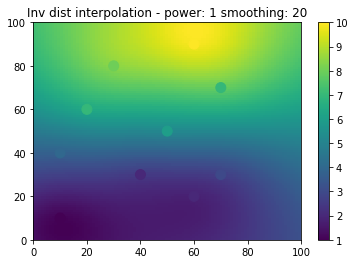

In [21]:
    
## this is an example that only runs when this python function is a standalone. 
## not when it is imported into another python file
# if __name__ == "__main__":
power = 1
smoothing=20

#Creating some data, with each coodinate and the values stored in separated lists
xv = [10,60,40,70,10,50,20,70,30,60]
yv = [10,20,30,30,40,50,60,70,80,90]
values = [1,2,2,3,4,6,7,7,8,10]

#Creating the output grid (100x100, in the example)
ti = np.linspace(0, 100, 100)
XI, YI = np.meshgrid(ti, ti)

#Creating the interpolation function and populating the output matrix value
ZI = invDist(xv,yv,values,100,100,power,smoothing)


# Plotting the result
n = plt.Normalize(0.0, 100.0)
plt.subplot(1, 1, 1)
plt.pcolor(XI, YI, ZI)
plt.scatter(xv, yv, 100, values)
plt.title('Inv dist interpolation - power: ' + str(power) + ' smoothing: ' + str(smoothing))
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.colorbar()

plt.show()
    

In [34]:
## this is an example that only runs when this python function is a standalone. 
## not when it is imported into another python file
# if __name__ == "__main__":


PTAL_grid =pd.read_csv("/Users/June/urbanDNA/Ele-June/June's Data/2015  PTALs Grid Values 280515.csv")
sub = PTAL_grid[PTAL_grid["X"]<510000]
sub = sub[sub["Y"]<172200]
    


power = 2
smoothing=200



xv = sub['X']
yv = sub['Y']
zv = sub['AI2015']
# txi = np.linspace(min(xv), max(xv), 1000)
# tyi = np.linspace(min(yv), max(yv), 1000)
# XI, YI = np.meshgrid(txi, tyi)


ti = np.linspace(0, 100, 100)
XI, YI = np.meshgrid(ti, ti)

#Creating the interpolation function and populating the output matrix value
ZI = invDist(xv,yv,zv,1000,1000,power,smoothing)

# plot the result
plt.subplot(1, 1, 1)
plt.pcolor(XI, YI, ZI, cmap=cm.jet)
# plt.scatter(x, y, 100, z, cmap=cm.jet)
plt.title('RBF interpolation - multiquadrics')
plt.xlim(min(xv),max(xv))
plt.ylim(min(yv), max(yv))
plt.colorbar()
plt.show()



KeyError: 0

In [31]:
len(txi)

1000